<a href="https://colab.research.google.com/github/ZubinO/independentStudy/blob/main/weightedNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import io
import pandas as pd
import tensorflow as tf
import random

from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
! gdown --id 18Pp1wG3SxPA24xg1eMvR7HIyRFC1S2P8


df3 = pd.read_csv(('/content/weightedData.csv'), dtype={"Weight": float, "Upvotes": float, "Comment": float, "UTC": float, "Team": str, "Opponent": str, "Winner": str, "UTC2": float, "Finally": int})


! gdown --id 18HZRfO5j4GnDD_J__1nfIM4VWPsIOqrd

poW = pd.read_csv(('/content/playoffWeights3.csv'), dtype={"Weight": float, "Title":str, "Body":str, "Upvotes": float, "Comment": float, "UTC": float, "Team": str, "Opponent": str, "Winner": str, "UTC2": float, "Finally": int})


/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=18Pp1wG3SxPA24xg1eMvR7HIyRFC1S2P8
To: /content/weightedData.csv
100% 454k/454k [00:00<00:00, 102MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=18HZRfO5j4GnDD_J__1nfIM4VWPsIOqrd
To: /content/playoffWeights3.csv
100% 741k/741k [00:00<00:00, 124MB/s]


In [ ]:
def locDiffMatches(df):
  toRet=[]
  temp1=df.at[0, "Opponent"]
  temp2=df.at[0, "Team"]
  for i in range(0, len(df)):
    if df.at[i, "Opponent"]!=temp1:
      toRet.append(i)
      #print(temp1)
      temp1=df.at[i, "Opponent"]
      #print(temp1)
      temp2=df.at[i,"Team"]
  return toRet
weightedDf=df3[:6221]
type(weightedDf)

pandas.core.frame.DataFrame

In [ ]:
def splitData(df):
  matchLoc=locDiffMatches(df)
  counter=0
  toRet=[]
  for j in matchLoc:
    tempArr=[]
    for i in range(counter, j):
      weight=df.at[i, "Weight"]
      upvotes=df.at[i, "Upvotes"]
      #timePost=df.at[i, "UTC2"]
      isComment=df.at[i, "Comment"]
      temp2=[weight,upvotes,isComment]
      tempArr.append(temp2)
    toRet.append(tempArr)
    counter=j+1
  tempArr=[]
  for i in range(matchLoc[len(matchLoc)-1], len(df)-1):
    weight=df.at[i, "Weight"]
    upvotes=df.at[i, "Upvotes"]
    #timePost=df.at[i, "UTC2"]
    isComment=df.at[i,"Comment"]
    temp2=[weight,upvotes, isComment]
    tempArr.append(temp2)
  toRet.append(tempArr)
  return toRet

inputs=splitData(weightedDf)


In [ ]:
def findMaxLen(inputs):
  maxLen=0
  for i in inputs:
    if len(i)>maxLen:
      maxLen=len(i)
  return maxLen

max=findMaxLen(inputs)
temp=inputs
def padData(inputs):
  bob=inputs
  for i in bob:
    while len(i)<max:
      i.append([0,0,0])
  return bob

paddedInputs=padData(inputs)


In [ ]:
def sumUpvotes(weightArr):
  sum=0
  for i in weightArr:
    sum+=i[1]
  return sum
  
def calcWeightedAverage(weightArr):
  upvotes=sumUpvotes(weightArr)
  total=0.0
  for i in weightArr:
    weight=float(i[1])/float(upvotes)
    total+=float(i[0])*weight
  return total



0.46899566324179115

In [ ]:
codeDict={
    "sea":"Seattle",
    "ari":"Arizona",
    "sf": "San Francisco",
    "gb": "Green Bay",
    "min": "Minnesota",
    "det": "Detroit",
    "chi":"Chicago",
    "dal":"Dallas",
    "wsh": "Washington",
    "phi": "Philadelphia",
    "tb":"Tampa Bay",
    "car":"Carolina",
    "no": "New Orleans",
    "atl":"Atlanta",
    "kc":"Kansas City",
    "den":"Denver",
    "lv":"Las Vegas",
    "pit":"Pittsburgh",
    "cin":"Cincinnati",
    "bal":"Baltimore",
    "cle":"Cleveland",
    "jax":"Jacksonville",
    "ten":"Tennessee",
    "hou":"Houston",
    "ind":"Indianapolis",
    "ne":"New England",
    "buf":"Buffalo",
    "mia":"Miami"


}

teamDict={
    "Seattle":["seahawks", "hawks"],
    "Arizona":["cardinals", "cards"],
    "San Francisco": ["49ers", "9ers"],
    "Green Bay": ["packers"],
    "Minnesota": ["vikings", "vikes"],
    "Detroit": ["lions"],
    "Chicago":["bears"],
    "Dallas":["cowboys"],
    "Washington": ["redskins", "football team"],
    "Philadelphia": ["eagles", "birds"],
    "Tampa Bay":["buccaneers", "bucs"],
    "Carolina":["panthers"],
    "New Orleans": ["saints", "nola"],
    "Atlanta":["falcons"],
    "Kansas City":["chiefs"],
    "Denver":["broncos"],
    "Las Vegas":["raiders"],
    "Pittsburgh":["steelers"],
    "Cincinnati":["bengals"],
    "Baltimore":["ravens"],
    "Cleveland":["browns"],
    "Jacksonville":["jaguars", "jags"],
    "Tennessee":["titans"],
    "Houston":["texans"],
    "Indianapolis":["colts"],
    "New England":["patriots", "pats"],
    "Buffalo":["bills"],
    "Miami":["dolphins"]


}


In [ ]:
def createLabels(df):
  labels=[]
  label=-1
  winner=df.at[0, "Winner"]
  opponent=df.at[0, "Opponent"]
  team=df.at[0, "Team"]
  if winner.lower()==opponent.lower():
    label=0
  elif codeDict[winner]==team:
    label=1
  labels.append(label)
  for i in locDiffMatches(weightedDf):
    label=-1
    winner=df.at[i, "Winner"]
    opponent=df.at[i, "Opponent"]
    team=df.at[i, "Team"]
    if winner.lower()==opponent.lower():
      label=0
    elif codeDict[winner]==team:
      label=1
    labels.append(label)
  return labels

labels=createLabels(weightedDf)


In [ ]:
total=0
for i in range(0,len(inputs)-1):
  res=calcWeightedAverage(inputs[i])*2
  res=int(res)
  if res == labels[i]:
    total+=1

total/len(labels)

0.5303030303030303

In [ ]:
size=35
xTrain = paddedInputs[0:size]
xTest = paddedInputs[size:]
yTrain = labels[0:size]
yTest = labels[size:]

xTrain = np.array(xTrain)
yTrain = np.array(yTrain)
xTest = np.array(xTest)
yTest = np.array(yTest)

#xTrain.append(fTest)

xTrain.shape[1:]



(369, 3)

In [ ]:
model = tf.keras.Sequential([
    #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, input_shape=(xTrain.shape[1:]))),
    #tf.keras.layers.Dropout(0.8),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.8), 
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.8), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [ ]:
history = model.fit(xTrain, yTrain, epochs=30, validation_data=(xTest, yTest), verbose=2)

Epoch 1/30
2/2 - 1s - loss: 0.7685 - accuracy: 0.5714 - val_loss: 1.1261 - val_accuracy: 0.6452 - 714ms/epoch - 357ms/step
Epoch 2/30
2/2 - 0s - loss: 1.8064 - accuracy: 0.6286 - val_loss: 1.1175 - val_accuracy: 0.7097 - 35ms/epoch - 18ms/step
Epoch 3/30
2/2 - 0s - loss: 3.8441 - accuracy: 0.4857 - val_loss: 1.1069 - val_accuracy: 0.6774 - 34ms/epoch - 17ms/step
Epoch 4/30
2/2 - 0s - loss: 3.6147 - accuracy: 0.4857 - val_loss: 1.0961 - val_accuracy: 0.6774 - 39ms/epoch - 20ms/step
Epoch 5/30
2/2 - 0s - loss: 1.5161 - accuracy: 0.5143 - val_loss: 1.0843 - val_accuracy: 0.6774 - 31ms/epoch - 16ms/step
Epoch 6/30
2/2 - 0s - loss: 0.8688 - accuracy: 0.5143 - val_loss: 1.0744 - val_accuracy: 0.6774 - 36ms/epoch - 18ms/step
Epoch 7/30
2/2 - 0s - loss: 0.8590 - accuracy: 0.6857 - val_loss: 1.0663 - val_accuracy: 0.6774 - 34ms/epoch - 17ms/step
Epoch 8/30
2/2 - 0s - loss: 0.6863 - accuracy: 0.6000 - val_loss: 1.0595 - val_accuracy: 0.6774 - 33ms/epoch - 17ms/step
Epoch 9/30
2/2 - 0s - loss: 1.

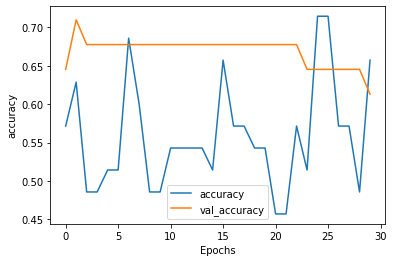

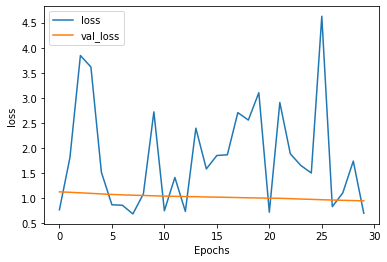

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")